# Importing the Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Reading the Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/aqi_daily_1980_to_2021.csv')

In [ ]:
dataset.shape

(10158527, 8)

In [ ]:
dataset.head()

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,Alabama,2021-01-01,30,Good,Ozone,34.289001,-85.970065,DeKalb
1,Alabama,2021-01-02,27,Good,Ozone,34.289001,-85.970065,DeKalb
2,Alabama,2021-01-03,34,Good,Ozone,34.289001,-85.970065,DeKalb
3,Alabama,2021-01-04,36,Good,Ozone,34.289001,-85.970065,DeKalb
4,Alabama,2021-01-05,31,Good,Ozone,34.289001,-85.970065,DeKalb


In [ ]:
alabama_records = dataset[dataset['State Name'] == 'Alabama']

In [ ]:
alabama_records.head()

,State Name,Date,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,Alabama,2021-01-01,30,Good,Ozone,34.289001,-85.970065,DeKalb
1,Alabama,2021-01-02,27,Good,Ozone,34.289001,-85.970065,DeKalb
2,Alabama,2021-01-03,34,Good,Ozone,34.289001,-85.970065,DeKalb
3,Alabama,2021-01-04,36,Good,Ozone,34.289001,-85.970065,DeKalb
4,Alabama,2021-01-05,31,Good,Ozone,34.289001,-85.970065,DeKalb


In [ ]:
alabama_records.shape

(140994, 8)

# Checking for Null Values

In [ ]:
alabama_records["AQI"].isnull().sum()

0

In [ ]:
alabama_records["Defining Parameter"].isnull().sum()

0

In [ ]:
alabama_records["Category"].isnull().sum()

0

In [ ]:
alabama_records['Latitude'].isnull().sum()

0

In [ ]:
alabama_records['Longitude'].isnull().sum()

0

In [ ]:
alabama_records['County Name'].isnull().sum()

0

# Dropping the Unwanted Columns

In [ ]:
alabama_records.drop(['State Name', 'Date'], axis=1, inplace=True)

<ipython-input-213-f5a510cc993f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alabama_records.drop(['State Name', 'Date'], axis=1, inplace=True)


In [ ]:
alabama_records.head()

,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,30,Good,Ozone,34.289001,-85.970065,DeKalb
1,27,Good,Ozone,34.289001,-85.970065,DeKalb
2,34,Good,Ozone,34.289001,-85.970065,DeKalb
3,36,Good,Ozone,34.289001,-85.970065,DeKalb
4,31,Good,Ozone,34.289001,-85.970065,DeKalb


# Analyzing the Columns

In [ ]:
alabama_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140994 entries, 0 to 9826242
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AQI                 140994 non-null  int64  
 1   Category            140994 non-null  object 
 2   Defining Parameter  140994 non-null  object 
 3   Latitude            140994 non-null  float64
 4   Longitude           140994 non-null  float64
 5   County Name         140994 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 7.5+ MB


In [ ]:
alabama_records.describe()

,AQI,Latitude,Longitude
count,140994.000000,140994.000000,140994.000000
mean,48.079769,33.051500,-86.822278
std,27.688534,1.326292,0.842692
min,0.000000,30.474305,-88.277992
25%,31.000000,32.412811,-87.459733
50%,43.000000,33.092800,-86.796389
75%,57.000000,34.289001,-86.255193
max,273.000000,34.772727,-84.999653


In [ ]:
alabama_records['Category'].value_counts()

Good                              94591
Moderate                          38330
Unhealthy for Sensitive Groups     6651
Unhealthy                          1294
Very Unhealthy                      128
Name: Category, dtype: int64

In [ ]:
alabama_records['Defining Parameter'].value_counts()

Ozone    85677
PM2.5    36186
PM10      8664
SO2       7048
CO        2319
NO2       1100
Name: Defining Parameter, dtype: int64

In [ ]:
alabama_records['County Name'].value_counts()

Jefferson     15013
Mobile        14136
Madison       13189
DeKalb        10857
Montgomery    10635
Shelby        10089
Morgan         9636
Etowah         8216
Sumter         7660
Elmore         7401
Tuscaloosa     7277
Russell        6583
Clay           6083
Lawrence       6073
Baldwin        5703
Escambia       1513
Pike            930
Name: County Name, dtype: int64

In [ ]:
import seaborn as sns

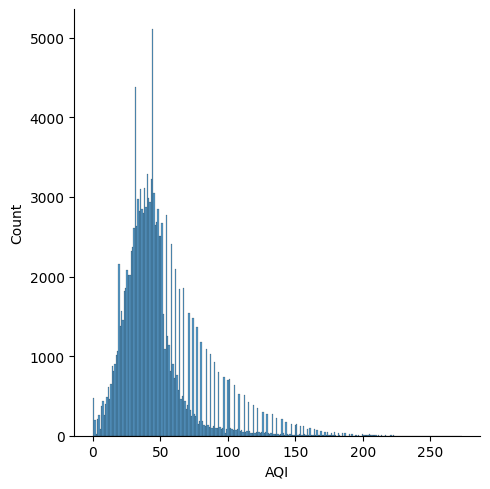

In [ ]:
sns.displot(alabama_records['AQI'])

<Axes: xlabel='count', ylabel='Defining Parameter'>

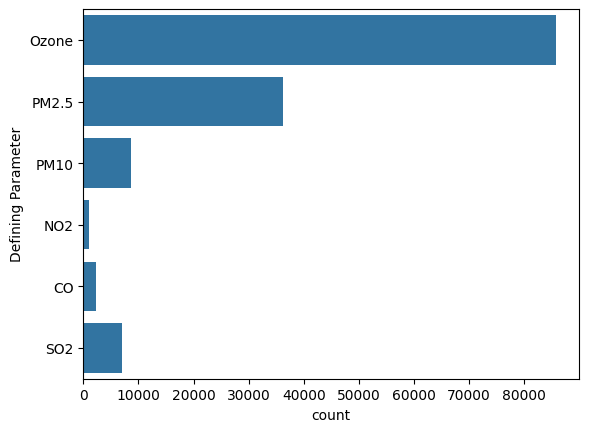

In [ ]:
sns.countplot(alabama_records['Defining Parameter'])

<Axes: xlabel='count', ylabel='County Name'>

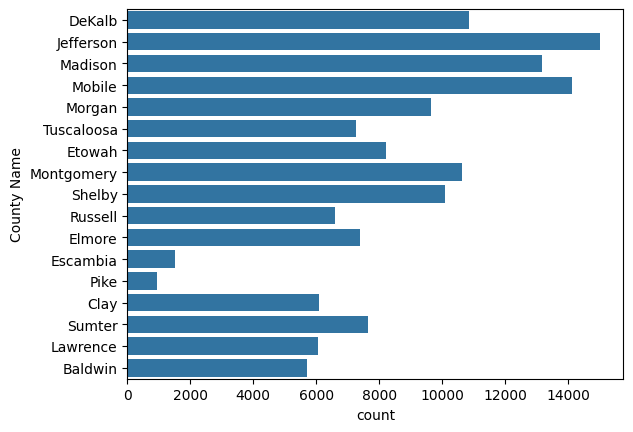

In [ ]:
sns.countplot(alabama_records['County Name'])

<Axes: xlabel='AQI', ylabel='Category'>

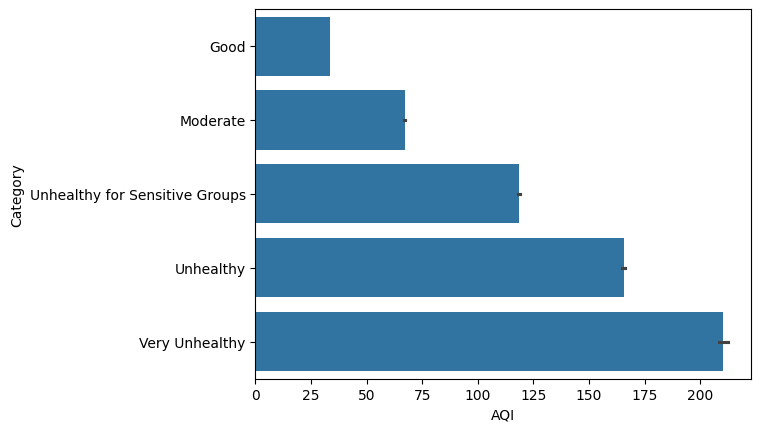

In [ ]:
sns.barplot(y='Category', x='AQI', data=alabama_records)

# Data Cleaning and Preprocessing

In [ ]:
alabama_records.head()

,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,30,Good,Ozone,34.289001,-85.970065,DeKalb
1,27,Good,Ozone,34.289001,-85.970065,DeKalb
2,34,Good,Ozone,34.289001,-85.970065,DeKalb
3,36,Good,Ozone,34.289001,-85.970065,DeKalb
4,31,Good,Ozone,34.289001,-85.970065,DeKalb


In [ ]:
alabama_records.replace({'Category':{'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}}, inplace=True)

<ipython-input-227-e7543393de19>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alabama_records.replace({'Category':{'Good': 0, 'Moderate': 1, 'Unhealthy for Sensitive Groups': 2, 'Unhealthy': 3, 'Very Unhealthy': 4, 'Hazardous': 5}}, inplace=True)


In [ ]:
alabama_records.replace({'Defining Parameter':{'Ozone': 0, 'PM2.5': 1, 'PM10': 2, 'CO': 3, 'SO2': 4, 'NO2': 5}}, inplace=True)

<ipython-input-228-5b09b2860151>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alabama_records.replace({'Defining Parameter':{'Ozone': 0, 'PM2.5': 1, 'PM10': 2, 'CO': 3, 'SO2': 4, 'NO2': 5}}, inplace=True)


In [ ]:
alabama_records['County Name'] = alabama_records['County Name'].astype('category')

<ipython-input-229-2562c16692da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alabama_records['County Name'] = alabama_records['County Name'].astype('category')


In [ ]:
alabama_records['County Name'] = alabama_records['County Name'].cat.codes

<ipython-input-230-e2173a9d9166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alabama_records['County Name'] = alabama_records['County Name'].cat.codes


In [ ]:
alabama_records.head()

,AQI,Category,Defining Parameter,Latitude,Longitude,County Name
0,30,0,0,34.289001,-85.970065,2
1,27,0,0,34.289001,-85.970065,2
2,34,0,0,34.289001,-85.970065,2
3,36,0,0,34.289001,-85.970065,2
4,31,0,0,34.289001,-85.970065,2


In [ ]:
alabama_records.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140994 entries, 0 to 9826242
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AQI                 140994 non-null  int64  
 1   Category            140994 non-null  int64  
 2   Defining Parameter  140994 non-null  int64  
 3   Latitude            140994 non-null  float64
 4   Longitude           140994 non-null  float64
 5   County Name         140994 non-null  int8   
dtypes: float64(2), int64(3), int8(1)
memory usage: 6.6 MB


In [ ]:
n_cols = 1
dataset = alabama_records["AQI"]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(140994, 1)

# Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0, 1))
scaled_data = scaler.fit_transform(np.array(data))

# Data Splitting

In [ ]:
train_size = int(len(data) * 0.75)
test_size = len(data) - train_size
print("Train Size :",train_size,"Test Size :",test_size)

Train Size : 105745 Test Size : 35249


In [ ]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(105745, 1)

# Creating Training Set

In [ ]:
x_train = []
y_train = []
time_steps = 60
n_cols = 1

for i in range(time_steps, len(scaled_data)):
    x_train.append(scaled_data[i-time_steps:i, :n_cols])
    y_train.append(scaled_data[i, :n_cols])
    if i<=time_steps:
        print('X_train: ', x_train)
        print('y_train:' , y_train)


X_train:  [array([[0.10989011],
       [0.0989011 ],
       [0.12454212],
       [0.13186813],
       [0.11355311],
       [0.0989011 ],
       [0.10622711],
       [0.08058608],
       [0.0952381 ],
       [0.09157509],
       [0.08791209],
       [0.07692308],
       [0.08424908],
       [0.14652015],
       [0.12820513],
       [0.10622711],
       [0.12454212],
       [0.12820513],
       [0.12087912],
       [0.11721612],
       [0.08058608],
       [0.10989011],
       [0.13186813],
       [0.11721612],
       [0.08058608],
       [0.12820513],
       [0.09157509],
       [0.12820513],
       [0.12820513],
       [0.13186813],
       [0.0989011 ],
       [0.13186813],
       [0.13553114],
       [0.13919414],
       [0.13553114],
       [0.12454212],
       [0.11355311],
       [0.11355311],
       [0.13553114],
       [0.15750916],
       [0.07692308],
       [0.05494505],
       [0.06959707],
       [0.07326007],
       [0.07692308],
       [0.1025641 ],
       [0.09157509],
  

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_cols))

In [ ]:
x_train.shape , y_train.shape

((140934, 60, 1), (140934, 1))

# LSTM Model Implementation

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential([
    LSTM(50, return_sequences= True, input_shape= (x_train.shape[1], n_cols)),
    LSTM(64, return_sequences= False),
    Dense(32),
    Dense(16),
    Dense(n_cols)
])

model.compile(optimizer= 'adam', loss= 'mse' , metrics= "mean_absolute_error")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 60, 50)            10400     
                                                                 
 lstm_15 (LSTM)              (None, 64)                29440     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 1)                 17        
                                                                 
Total params: 42465 (165.88 KB)
Trainable params: 42465 (165.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs= 10, batch_size= 32)

Epoch 1/10
4405/4405 [==============================] - 43s 9ms/step - loss: 0.0057 - mean_absolute_error: 0.0529
Epoch 2/10
4405/4405 [==============================] - 41s 9ms/step - loss: 0.0055 - mean_absolute_error: 0.0517
Epoch 3/10
4405/4405 [==============================] - 48s 11ms/step - loss: 0.0055 - mean_absolute_error: 0.0515
Epoch 4/10
4405/4405 [==============================] - 39s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0512
Epoch 5/10
4405/4405 [==============================] - 42s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0508
Epoch 6/10
4405/4405 [==============================] - 39s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0506
Epoch 7/10
4405/4405 [==============================] - 40s 9ms/step - loss: 0.0053 - mean_absolute_error: 0.0505
Epoch 8/10
4405/4405 [==============================] - 39s 9ms/step - loss: 0.0054 - mean_absolute_error: 0.0506
Epoch 9/10
4405/4405 [==============================] - 40s 9ms/step - loss: 0.0054 - m

# Evaluation of the Model

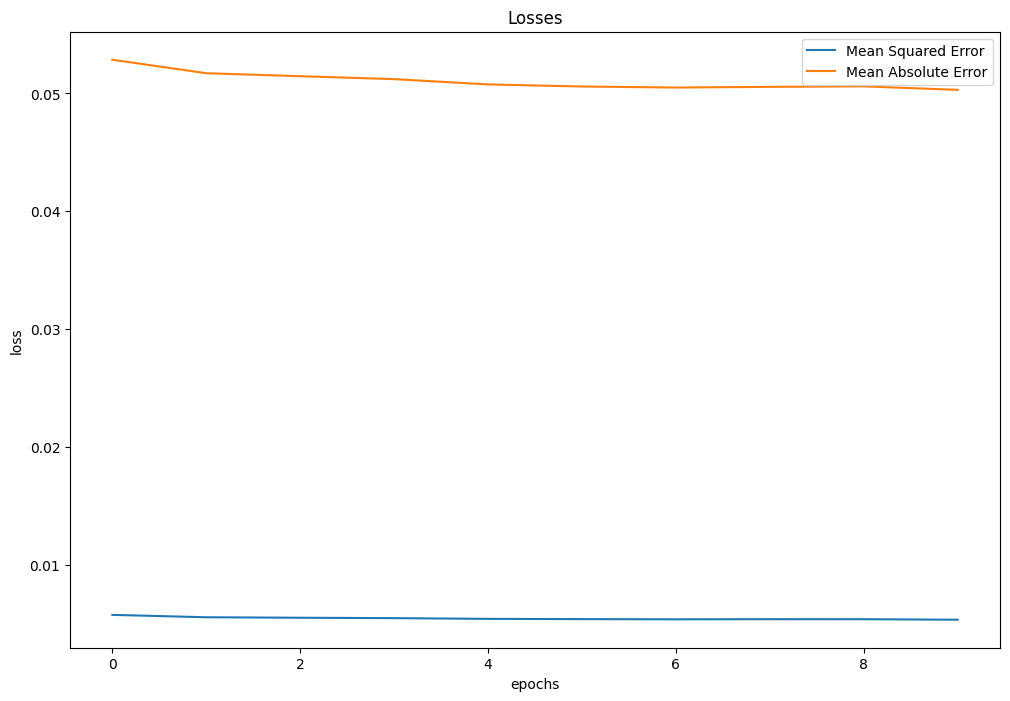

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mean_absolute_error"])
plt.legend(['Mean Squared Error','Mean Absolute Error'])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

# Visualizing the Predictions

In [ ]:

time_steps = 60
test_data = scaled_data[train_size - time_steps:, :]

x_test = []
y_test = []
n_cols = 1

for i in range(time_steps, len(test_data)):
    x_test.append(test_data[i-time_steps:i, 0:n_cols])
    y_test.append(test_data[i, 0:n_cols])
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_cols))

In [ ]:
predictions = model.predict(x_test)

1102/1102 [==============================] - 5s 4ms/step


In [ ]:
predictions.shape

(35249, 1)

In [ ]:
predictions = scaler.inverse_transform(predictions)
predictions.shape

(35249, 1)

In [ ]:
y_test = scaler.inverse_transform(y_test)

In [ ]:
preds_acts = pd.DataFrame(data={'Predictions':predictions.flatten(), 'Actuals':y_test.flatten()})

In [ ]:
preds = preds_acts[:200]

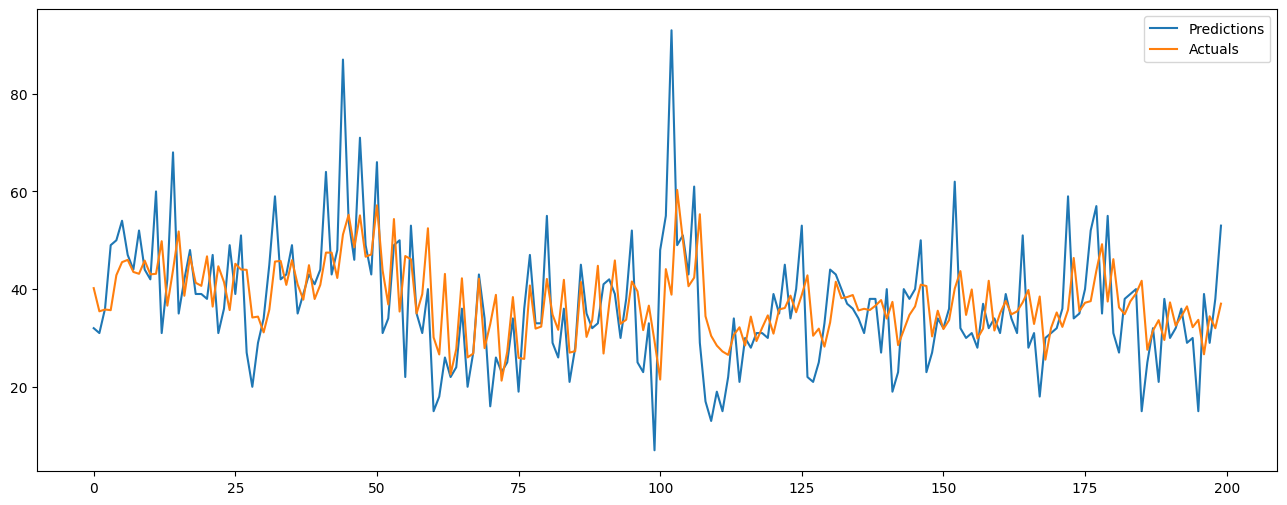

In [ ]:
plt.figure(figsize = (16, 6))
plt.plot(preds['Actuals'])
plt.plot(preds['Predictions'])
plt.legend(['Predictions', 'Actuals'])
plt.show()